In [2]:
import cv2
import dlib
import numpy
import matplotlib.pyplot as plt
from skimage import io

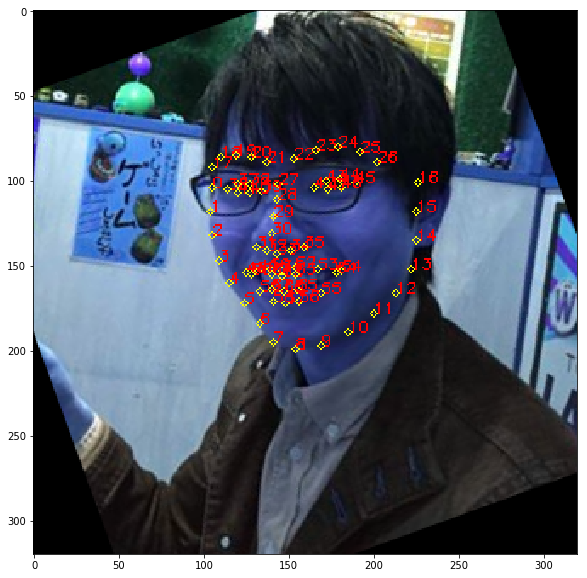

In [7]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 10.0)
# 学習済みモデルをpredictorに適用
PREDICTOR_PATH = "shape_predictor_68_face_landmarks.dat"
predictor = dlib.shape_predictor(PREDICTOR_PATH)

# openCVのパスを
cascade_path = '/anaconda3/lib/python3.7/site-packages/cv2/data/haarcascade_frontalface_default.xml'
cascade = cv2.CascadeClassifier(cascade_path)

def get_landmarks(image):
    rects = cascade.detectMultiScale(image, 1.01, 20)
    landmarks_list = []
    for rect in rects:
        (x,y,w,h) = rect
        rect_dlib = dlib.rectangle(x, y, x+w, y+h)
        landmarks = numpy.matrix([[p.x, p.y] for p in predictor(image, rect_dlib).parts()])
        landmarks_list.append(landmarks)
    return landmarks_list

def annotate_landmarks(image, landmarks_list):
    image = image.copy()
    for landmarks  in landmarks_list:
        for idx, point in enumerate(landmarks):
            pos = (point[0,0], point[0,1])
            cv2.putText(image, str(idx), pos, fontFace=cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, fontScale=0.3, color=(255,0,0))
            cv2.circle(image,pos,2,color=(255,255,0))
    return image

if __name__=='__main__':
    image=cv2.imread('facebook_films/miwa.jpg')
    # 元画像の中心を軸に回転する
    h, w = image.shape[:2]
    center = (w/2, h/2)
    scale = 1.0
    size = (w, h)
    rotation_matrix = cv2.getRotationMatrix2D(center, 20, scale)
    image = cv2.warpAffine(image, rotation_matrix,  size)
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    plt.imshow(annotate_landmarks(image,get_landmarks(gray)))